#Reading Data and Importing Libaries

In [ ]:

# Paths to data sets
#Change these Path to the paths where the data is located
PATH_to_train = ""
PATH_to_test = ""
#Run this if the data is stored on google drive, to connect to it
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [ ]:
#Reading Data
data_pd = pd.read_csv(PATH_to_train)
test_pd = pd.read_csv(PATH_to_test)

y = data_pd.Status
X = data_pd.drop(['Status'], axis=1)
train_X, valid_X, train_y, valid_y = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)



train_id = train_X.id
train_X = train_X.drop(['id'], axis=1)



valid_id = valid_X.id
valid_X = valid_X.drop(['id'], axis=1)

test_id = test_pd.id
test_X = test_pd.drop(['id'], axis=1)

In [ ]:
#Dataset preview
data_pd.head()
#data_pd.describe()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [ ]:
#test_pd.head()

#nan_rows = train_X[train_X.isnull().any(axis=1)]

# Print rows with NaN values
#print(nan_rows)

#nan_rows = test_X[test_X.isnull().any(axis=1)]
#print(nan_rows)


In [ ]:
#Count the number of NAN entries in the respective columns
#nan_count = test_X.isna().sum()
#print(np.shape(test_X))
#print(nan_count)

#unique_count = test_X.nunique()
#print(unique_count)

#Print the amount of unique variable in each columns
#unique_count = train_X.nunique()
#print(unique_count)

#Additional Feature Engineering

In [ ]:
"""

Albumin
Normal level - 3.4 to 5.4 g/dL
Liver/ kidney disease - < 3.4 g/dl
Other surgical complications- > 5.4 g/dl
Copper levels
Normal level - 62 to 140 micrograms per deciliter (mcg/dL)
Liver/ kidney disease risk - > 140 micrograms per deciliter (mcg/dL)
Alkaline Phosphatase- Alk_Phos
Normal level - 44 and 147 U/L (adults)
Bone/ Liver diseases - > 147 U/L
SGOT
Normal level - 8 and 45 units per liter of serum
Disease level - > 50 for cisgender males and > 45 for female
Tryglicerides
Normal level - < 150mg/dl
Borderline high- 150 -199 mg/dL
High - 200 - 499 mg/dl
Very high - > 499 mg/dl
Platelets
Normal level - 150,000 to 450,000 platelets per microliter of blood
Bleeding issues - < 150,000 platelets per microliter of blood
Prothrombin
Normal level - 11- 13.5
"""
def copper_risk(row):
  if row['Copper']>140:
    return 1
  return 0

def albumin_low(row):
  if row['Albumin'] < 3.4:
    return 1
  return 0
def albumin_normal(row):
  if row['Albumin'] > 3.4 and row['Albumin'] <5.4:
    return 1
  return 0

def cholesterol_high(row):
  if row['Cholesterol']>=240:
    return 1
  return 0
def cholesterol_normal(row):
  if row['Cholesterol'] < 200:
    return 1
  return 0
def jaundice(row):
  if row['Bilirubin'] >= 3:
    return 1
  return 0
def bilirubinnormal(row):
  if (row['Age'] < 6570 and row['Bilirubin'] < 1.0) or (row['Bilirubin'] < 1.2 and row['Age']> 6570):
    return 1
  else:
    return 0

#train_X, valid_X, test_X
train_X['copper_risk'] = train_X.apply(lambda row: copper_risk(row), axis=1)
train_X['albumin_low'] = train_X.apply(lambda row: albumin_low(row), axis=1)
train_X['albumin_normal'] = train_X.apply(lambda row: albumin_normal(row), axis=1)
train_X['cholesterol_high'] = train_X.apply(lambda row: cholesterol_high(row), axis=1)
train_X['cholesterol_normal'] = train_X.apply(lambda row: cholesterol_normal(row), axis=1)
train_X['jaundice'] = train_X.apply(lambda row: jaundice(row), axis=1)
train_X['bilirubinnormal'] = train_X.apply(lambda row: bilirubinnormal(row), axis=1)

valid_X['copper_risk'] = valid_X.apply(lambda row: copper_risk(row), axis=1)
valid_X['albumin_low'] = valid_X.apply(lambda row: albumin_low(row), axis=1)
valid_X['albumin_normal'] = valid_X.apply(lambda row: albumin_normal(row), axis=1)
valid_X['cholesterol_high'] = valid_X.apply(lambda row: cholesterol_high(row), axis=1)
valid_X['cholesterol_normal'] = valid_X.apply(lambda row: cholesterol_normal(row), axis=1)
valid_X['jaundice'] = valid_X.apply(lambda row: jaundice(row), axis=1)
valid_X['bilirubinnormal'] = valid_X.apply(lambda row: bilirubinnormal(row), axis=1)

test_X['copper_risk'] = test_X.apply(lambda row: copper_risk(row), axis=1)
test_X['albumin_low'] = test_X.apply(lambda row: albumin_low(row), axis=1)
test_X['albumin_normal'] = test_X.apply(lambda row: albumin_normal(row), axis=1)
test_X['cholesterol_high'] = test_X.apply(lambda row: cholesterol_high(row), axis=1)
test_X['cholesterol_normal'] = test_X.apply(lambda row: cholesterol_normal(row), axis=1)
test_X['jaundice'] = test_X.apply(lambda row: jaundice(row), axis=1)
test_X['bilirubinnormal'] = test_X.apply(lambda row: bilirubinnormal(row), axis=1)

#Data Preprocessing

In [ ]:
#Get Categorical columns
s = (data_pd.dtypes == 'object')
object_cols = list(s[s].index)

s = (data_pd.dtypes == 'float64')
float_cols = list(s[s].index)
float_cols.remove("Stage")

print("Categorical variables:")
#Remove columns used for one hot coding
object_cols.remove("Status")
object_cols.remove("Edema")
print(object_cols)

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
train_X[object_cols] = ordinal_encoder.fit_transform(train_X[object_cols])
valid_X[object_cols] = ordinal_encoder.transform(valid_X[object_cols])
test_X[object_cols] = ordinal_encoder.transform(test_X[object_cols])


Categorical variables:
['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders']


In [ ]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(sparse_output=False)
object_cols = ["Edema"]
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_X[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(valid_X[object_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(test_X[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = train_X.index
OH_cols_valid.index = valid_X.index
OH_cols_test.index = test_X.index

OH_cols_train.columns = OH_encoder.get_feature_names_out(["Edema"])
OH_cols_valid.columns = OH_encoder.get_feature_names_out(["Edema"])
OH_cols_test.columns = OH_encoder.get_feature_names_out(["Edema"])
# Remove categorical columns (will replace with one-hot encoding)
num_X_train = train_X.drop(object_cols, axis=1)
num_X_valid = valid_X.drop(object_cols, axis=1)
num_X_test = test_X.drop(object_cols, axis=1)
# Add one-hot encoded columns to numerical features
train_X = pd.concat([num_X_train, OH_cols_train], axis=1)
valid_X = pd.concat([num_X_valid, OH_cols_valid], axis=1)
test_X = pd.concat([num_X_test, OH_cols_test], axis=1)

# Ensure all columns have string type
#OH_X_train.columns = OH_X_train.columns.astype(str)
#OH_X_valid.columns = OH_X_valid.columns.astype(str)



In [ ]:
#TODO floatcols and y rescaling
scaler = StandardScaler()
train_X[float_cols] = scaler.fit_transform(train_X[float_cols])
valid_X[float_cols] = scaler.transform(valid_X[float_cols])
test_X[float_cols] = scaler.transform(test_X[float_cols])

OH_encoder = OneHotEncoder(sparse_output=False)
train_y = OH_encoder.fit_transform(train_y.values.reshape(-1,1))
valid_y = OH_encoder.transform(valid_y.values.reshape(-1,1))


In [ ]:
def scoring_function(y_true, y_pred):

  epsilon = 1e-15  # to prevent log(0) cases
  num_samples = len(y_true)
  num_classes = len(y_pred[0])

  # Clip y_pred to prevent log(0) or log(1) cases
  y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
  #print(y_pred)
  # Compute the log loss for each sample and each class
  individual_log_loss = np.sum(y_true * np.log(y_pred), axis=1)
  #print(individual_log_loss)
  log_loss = -np.sum(individual_log_loss) / num_samples
  return log_loss


#Exploratory Data Analysis

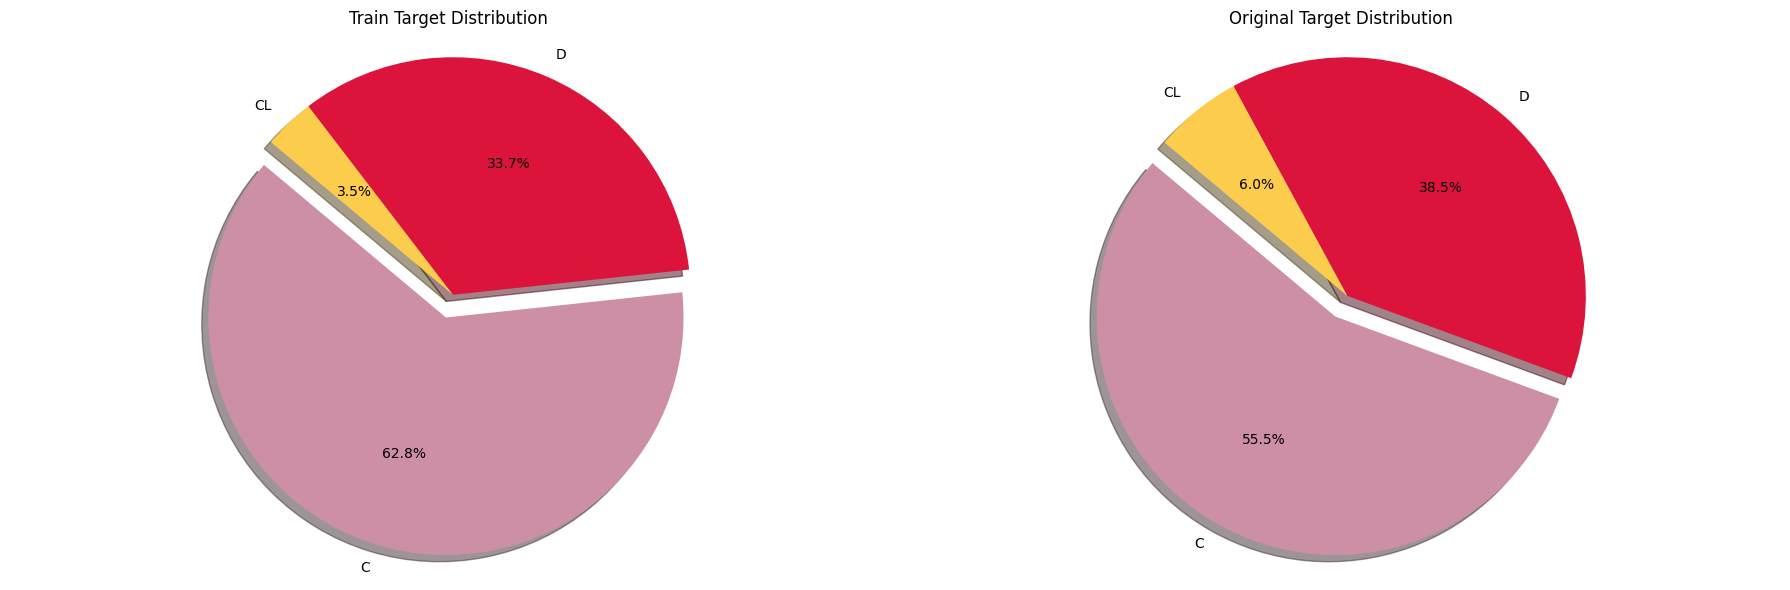

In [ ]:
def plot_pie_chart(data, title, ax):
    data_counts = data['Status'].value_counts()
    labels = data_counts.index
    sizes = data_counts.values
    colors = [(0.8, 0.56, 0.65), 'crimson',  (0.99, 0.8, 0.3)]
    explode = (0.1, 0, 0)

    ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    ax.axis('equal')
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # Create three subplots in a row

plot_pie_chart(data_pd, "Train Target Distribution", axes[0])
#plot_pie_chart(original_pd, "Original Target Distribution", axes[1])

plt.tight_layout()
plt.show()

In [ ]:
data_pd.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


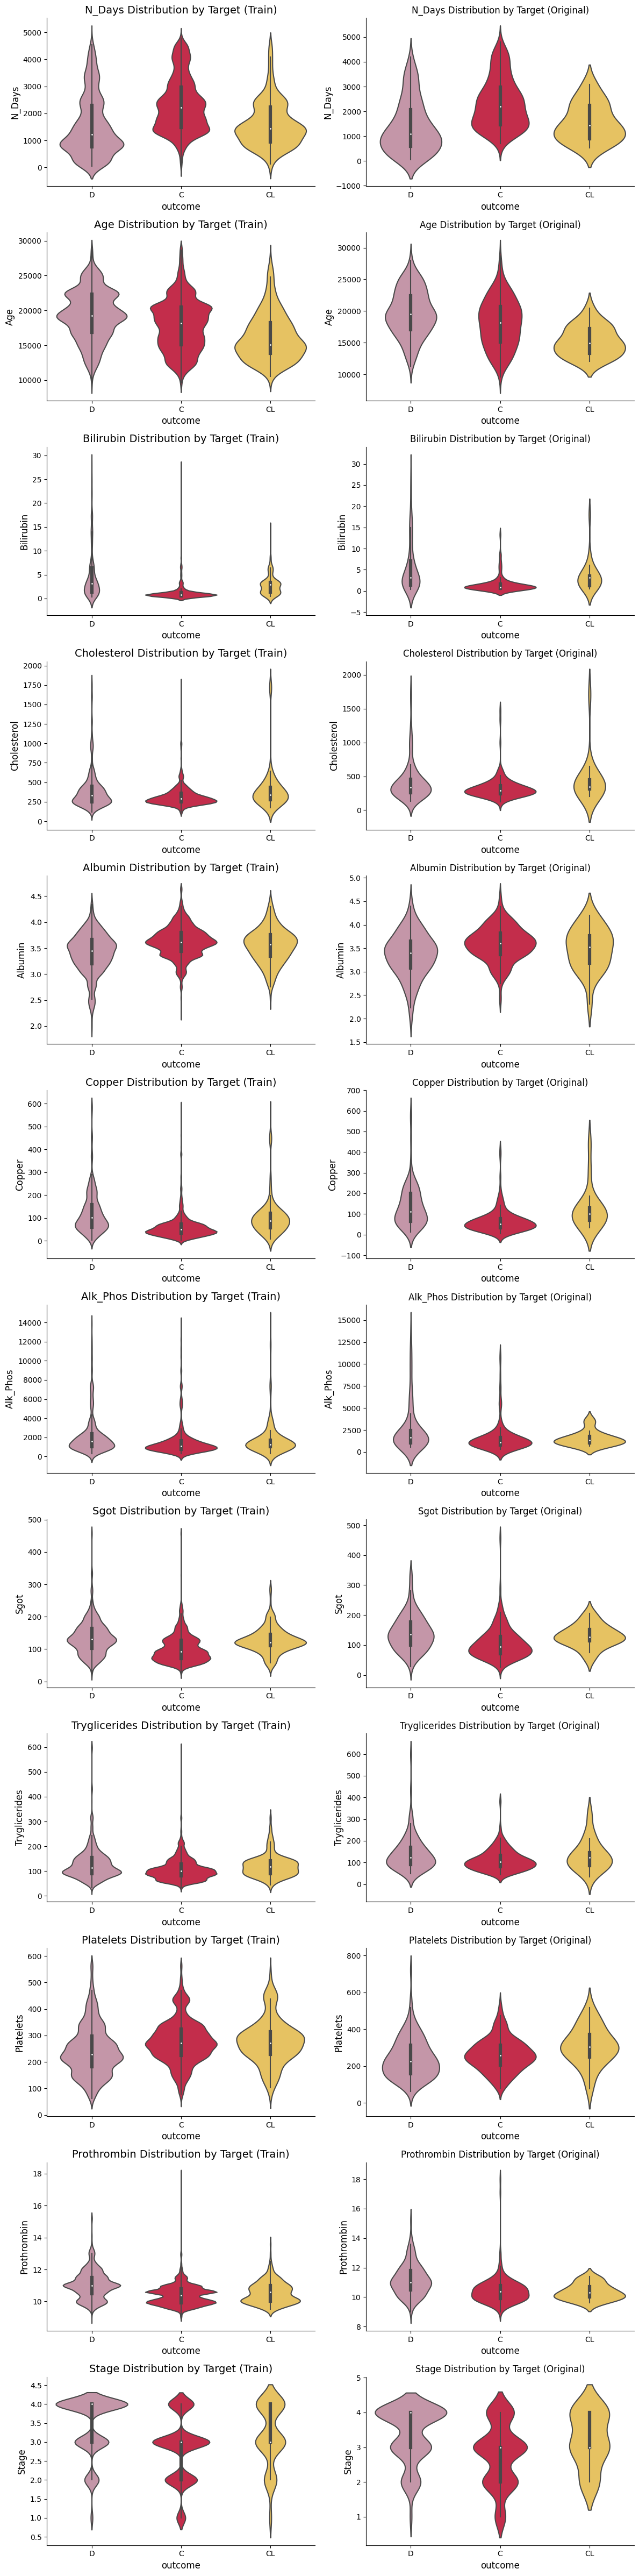

In [ ]:
data_copy=data_pd.copy()
#original_copy=original_pd.copy()
data_copy = data_copy.drop(['id'], axis=1)
#original_copy = original_copy.drop(['ID'], axis=1)

cont_cols = [f for f in data_copy.columns if data_copy[f].dtype != 'O' and data_copy[f].nunique() > 2]
print(cont_cols)
n_rows = len(cont_cols)
fig, axs = plt.subplots(n_rows, 2, figsize=(12, 4 * n_rows))
sns.set_palette([(0.8, 0.56, 0.65), 'crimson',  (0.99, 0.8, 0.3)])

for i, col in enumerate(cont_cols):
    sns.violinplot(x='Status', y=col, data=data_copy, ax=axs[i, 0])
    axs[i, 0].set_title(f'{col.title()} Distribution by Target (Train)', fontsize=14)
    axs[i, 0].set_xlabel('outcome', fontsize=12)
    axs[i, 0].set_ylabel(col.title(), fontsize=12)
    sns.despine()

    #sns.violinplot(x='Status', y=col, data=original_copy, ax=axs[i, 1])
    #axs[i, 1].set_title(f'{col.title()} Distribution by Target (Original)', fontsize=12)
    #axs[i, 1].set_xlabel('outcome', fontsize=12)
    #axs[i, 1].set_ylabel(col.title(), fontsize=12)
    #sns.despine()

fig.tight_layout()

plt.show()

In [ ]:
cat_cols = [f for f in data_copy.columns if (data_copy[f].dtype != 'O' and data_copy [f].nunique() / data_copy.shape[0] < 0.025) or (data_copy[f].dtype == 'O' and f not in [data_copy ]) ]
custom_palette =(0.8, 0.56, 0.65), 'crimson',  (0.99, 0.8, 0.3)
for col in cat_cols:
    contingency_table = pd.crosstab(data_copy [col], data_copy['Status'], normalize='index')
    sns.set(style="whitegrid")
    contingency_table.plot(kind="bar", stacked=True, color=custom_palette,figsize=(20, 4))
    plt.title(f"Percentage Distribution of Target across {col}")
    plt.xlabel(col)
    plt.ylabel("Percentage")
    plt.legend(title="Target Class")
    plt.show()

ValueError: ignored

#Different models

In [ ]:
estimators = [50, 100, 150, 200, 300, 400]
achieved_scores = []
for estimate in estimators:
  clf = RandomForestClassifier(n_estimators=estimate, random_state=0)
  scores = cross_val_score(clf, train_X, train_y, cv=5)#, scoring=scoring_function)
  #print(scores)
  achieved_scores.append(scores.mean())

print(achieved_scores)

[0.8020250662930906, 0.8058205333466754]


In [ ]:
#7.42
#estimate = estimators[np.argmax(achieved_scores)] #150
estimate = 150
clf = RandomForestClassifier(n_estimators=estimate, random_state=0)
clf.fit(train_X, train_y)
valid_predictions = clf.predict(valid_X)

In [ ]:
#6.
clf0 = RandomForestClassifier()
clf0.fit(train_X, train_y[:, 0])
clf1 = RandomForestClassifier()
clf1.fit(train_X, train_y[:, 1])
clf2 = RandomForestClassifier()
clf2.fit(train_X, train_y[:, 2])

predictions_0 = clf0.predict(valid_X)
predictions_1 = clf1.predict(valid_X)
predictions_2 = clf2.predict(valid_X)

valid_predictions = np.column_stack((predictions_0, predictions_1, predictions_2))
valid_predictions = np.clip(valid_predictions, 0, 1)

In [ ]:
clf = Ridge(alpha=1.0) #0.6789
clf.fit(train_X, train_y)
valid_predictions = clf.predict(valid_X)
valid_predictions = np.clip(valid_predictions, 0, 1)

In [ ]:
#0.6789
clf0 = Ridge(alpha=1.0)
clf0.fit(train_X, train_y[:, 0])
clf1 = Ridge(alpha=1.0)
clf1.fit(train_X, train_y[:, 1])
clf2 = Ridge(alpha=1.0)
clf2.fit(train_X, train_y[:, 2])

predictions_0 = clf0.predict(valid_X)
predictions_1 = clf1.predict(valid_X)
predictions_2 = clf2.predict(valid_X)



# Concatenate arrays along the second axis (axis=1)

valid_predictions = np.column_stack((predictions_0, predictions_1, predictions_2))
#valid_predictions = [predictions_0, predictions_1, predictions_2]
valid_predictions = np.clip(valid_predictions, 0, 1)


(1581, 3)
(3, 1581)


In [ ]:
#Create a larger training set for final model submission
print(np.shape(train_X))
print(type(train_X))
train_X_large = pd.concat([train_X, valid_X])
print(np.shape(train_y))
train_y_large = np.append(train_y, valid_y, axis=0)
print(np.shape(train_X_large))
print(np.shape(train_y_large))
train_X = train_X_large
train_y = train_y_large

(6324, 27)
<class 'pandas.core.frame.DataFrame'>
(6324, 3)
(7905, 27)
(7905, 3)


In [ ]:
#max_dept 5
xgb_params = {'max_depth': 5,
 'min_child_weight': 8,
 'learning_rate': 0.10450346600896168,
 'n_estimators': 225,
 'subsample': 0.5855025206558809,
 'colsample_bytree': 0.14926372575849994,
 'reg_alpha': 0.7621405624015435,
 'reg_lambda': 0.6443164876665903,
         'tree_method': 'hist',
        'eval_metric': 'mlogloss',
          'device' : 'cuda',
        'verbosity': 2,
 'random_state': 42}
xgb_model = XGBClassifier(**xgb_params )
xgb_model.fit(train_X, train_y )

    # predictions on the validation set
valid_predictions = xgb_model.predict_proba(valid_X)
valid_predictions = np.clip(valid_predictions, 0, 1)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [14:13:55] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


In [ ]:
clf = RandomForestRegressor(n_estimators=200) #0.6754
clf.fit(train_X, train_y)
valid_predictions = clf.predict(valid_X)
valid_predictions = np.clip(valid_predictions, 0, 1)

In [ ]:

#valid_predictions = valid_predictions.transpose()
print(np.shape(valid_y))
print(scoring_function(valid_y, valid_predictions))

(1581, 3)
0.46958084064618266


In [ ]:
#Depending on the model the output needs to be processed differently
ids = test_id
predictions = xgb_model.predict_proba(test_X)
predictions = np.clip(predictions, 0, 1)

In [ ]:
#Depending on the model the output needs to be processed differently
ids = test_id
predictions = clf.predict(test_X)
predictions = np.clip(predictions, 0, 1)

In [ ]:
#Depending on the model the output needs to be processed differently
ids = test_id
predictions_0 = clf0.predict(test_X)
predictions_1 = clf1.predict(test_X)
predictions_2 = clf2.predict(test_X)

predictions = [predictions_0, predictions_1, predictions_2]
predictions = np.clip(predictions, 0, 1)

In [ ]:
#Create Output File
def createsubmissioncsv(predicted_val, ids):
  with open ('submission.csv','w') as f:
    f.write ('id,Status_C,Status_CL,Status_D\n')
    for( id, predictions ) in zip ( ids, predicted_val):
      f.write ("{},{},{},{}\n". format ( id, predictions[0], predictions[1], predictions[2]))


createsubmissioncsv(predictions, ids)